In [1]:
import xarray as xr 
import json 
import pandas as pd 
import csv 
import glob 
import os 
import matplotlib.pyplot as plt 

In [2]:
from xarray_utils import csv_dims_to_lists, xarray_results_dataset

In [3]:
results_dir = "/home/murloc/Bureau/results"
phi_2D_results = glob.glob(results_dir + '/rec_Phi2D_*')
phi_2D_results.sort() 

In [4]:
images_dir = '/home/murloc/Bureau/CEA_stage/Images/'

In [5]:
xarray_datasets = [] 

for rec_dir in phi_2D_results:
    methods, data, diags = csv_dims_to_lists(rec_dir + '/') 
    ds = xarray_results_dataset(rec_dir + '/', data_dimension=2) 
    xarray_datasets.append(ds) 


In [6]:
from xarray_utils import rth_slice_dataset, thphi_slice_dataset 

In [7]:
rth_ds = []
thphi_ds = [] 

for ds in xarray_datasets:
    rth_ds.append(rth_slice_dataset(ds)) 
    thphi_ds.append(thphi_slice_dataset(ds)) 

In [8]:
rth_full_ds = xr.concat(rth_ds, dim='data') 
thphi_full_ds = xr.concat(thphi_ds, dim='data') 

## Analysis of Phi_rth  on the full simulation 

[]

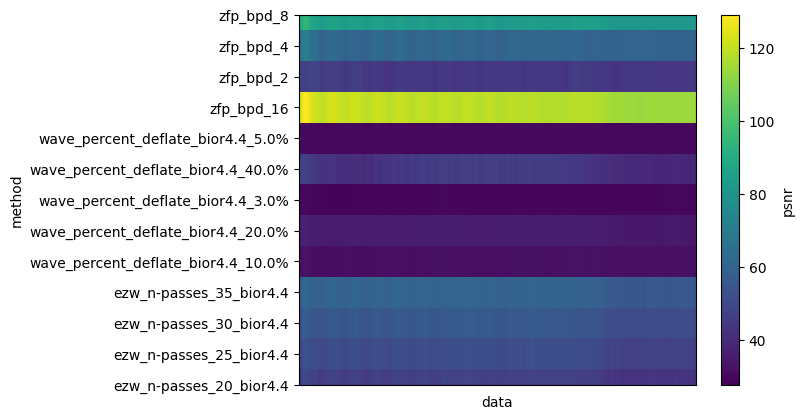

In [9]:
p = rth_full_ds.psnr.mean(dim='diag').plot()  
p.axes.get_xaxis().set_ticks([]) 

[]

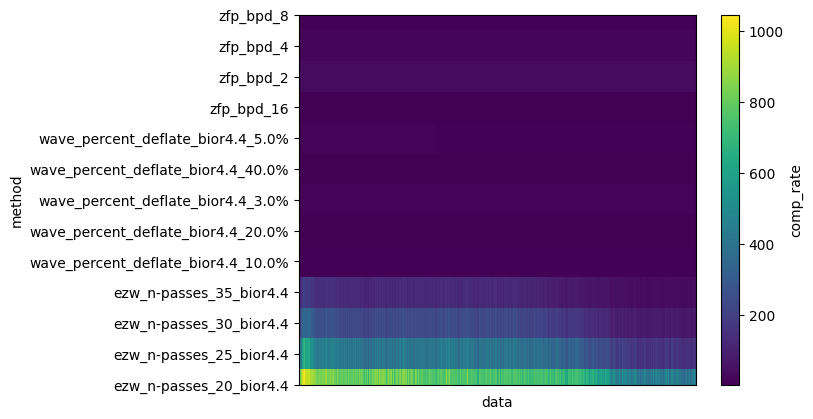

In [10]:
p = rth_full_ds.comp_rate.plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

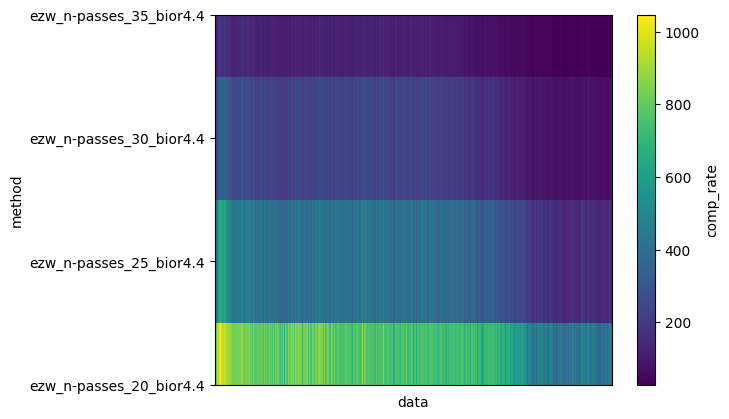

In [11]:
p = rth_full_ds.comp_rate[:4].plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

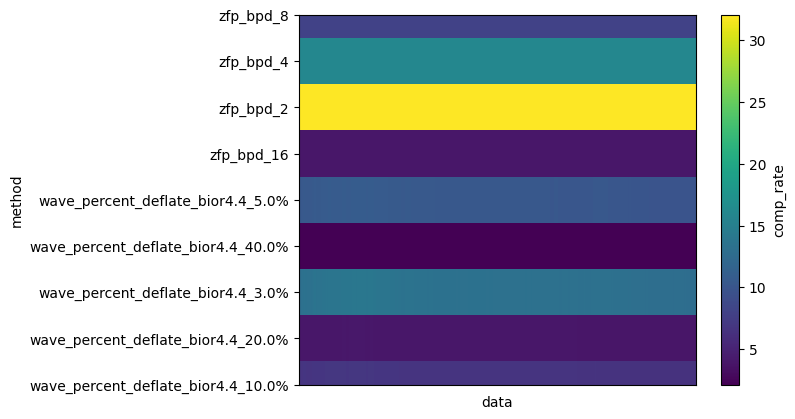

In [12]:
p = rth_full_ds.comp_rate[4:].plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

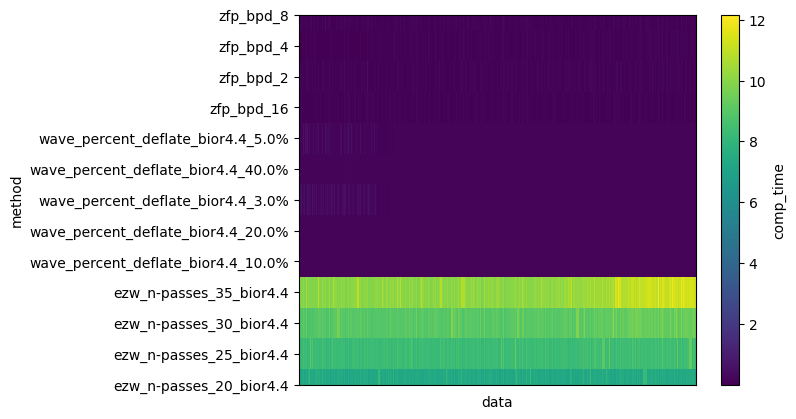

In [13]:
p = rth_full_ds.comp_time.plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

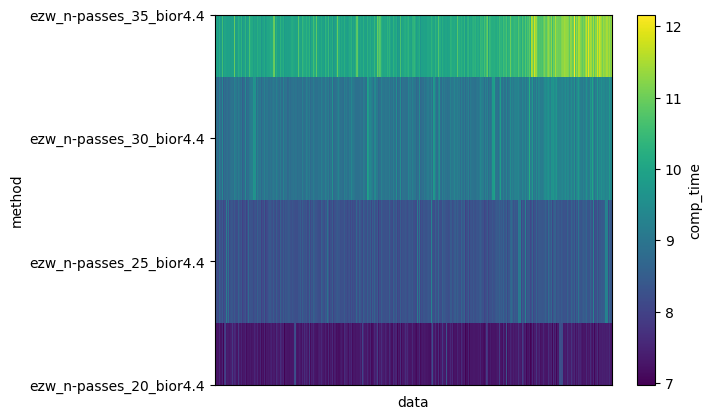

In [14]:
p = rth_full_ds.comp_time[:4].plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

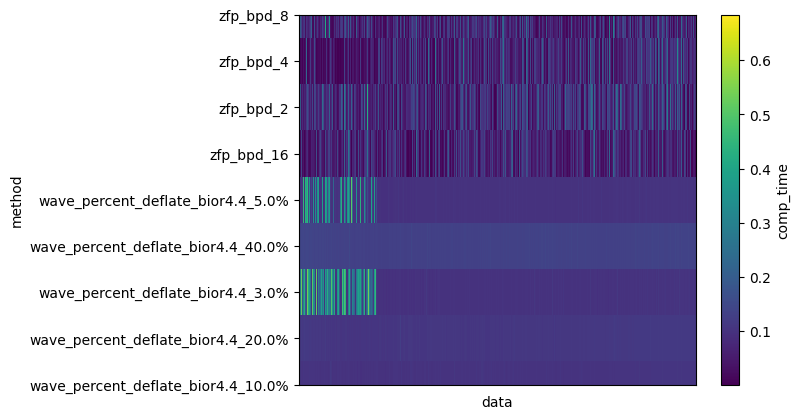

In [15]:
p = rth_full_ds.comp_time[4:].plot() 
p.axes.get_xaxis().set_ticks([])

[]

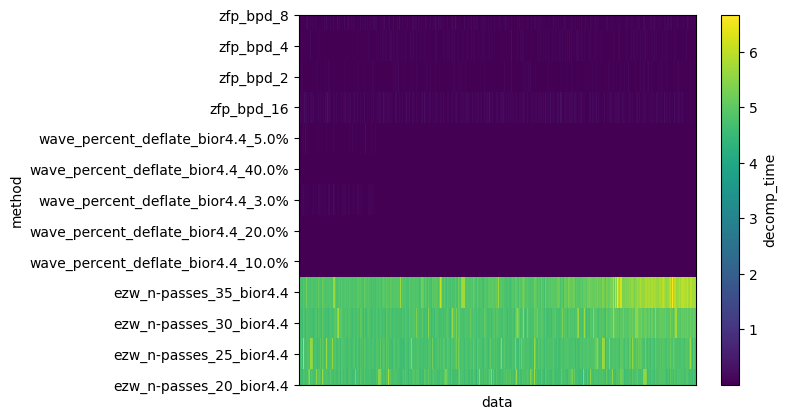

In [16]:
p = rth_full_ds.decomp_time.plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

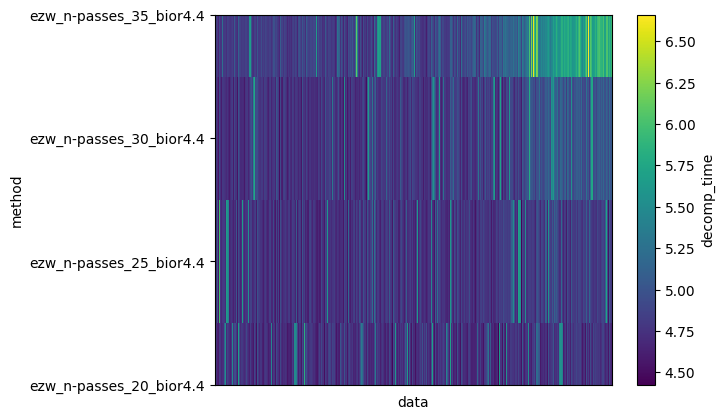

In [17]:
p = rth_full_ds.decomp_time[:4].plot() 
p.axes.get_xaxis().set_ticks([]) 

[]

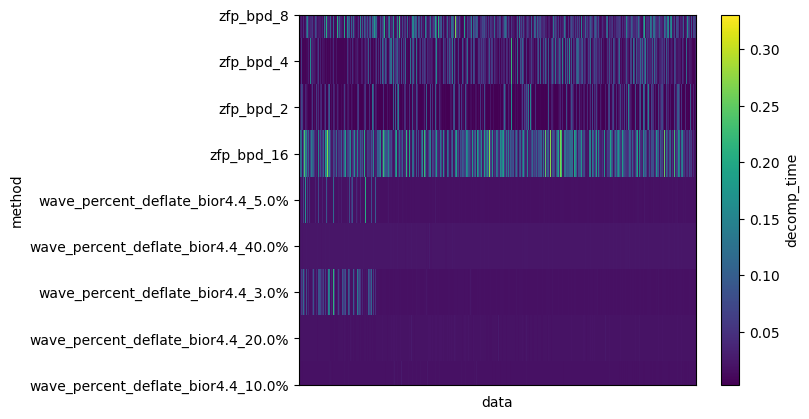

In [18]:
p = rth_full_ds.decomp_time[4:].plot() 
p.axes.get_xaxis().set_ticks([]) 

# Analysis of Phi_thphi on the full simulation 

[]

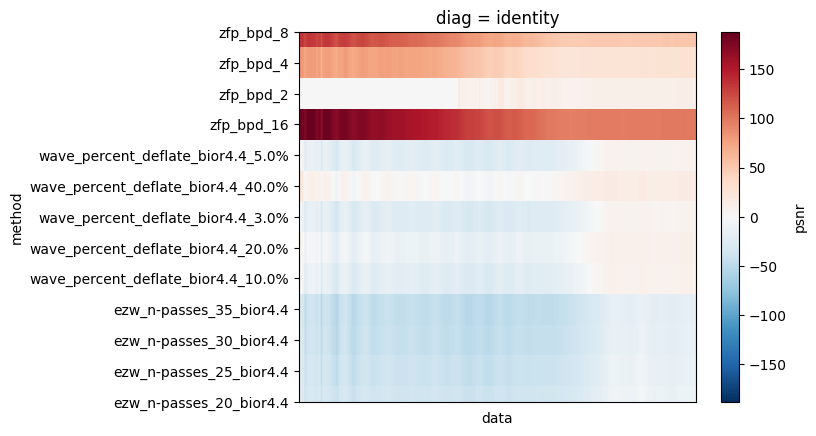

In [19]:
p = thphi_full_ds.psnr.sel(diag='identity').plot() 
p.axes.get_xaxis().set_ticks([])


[]

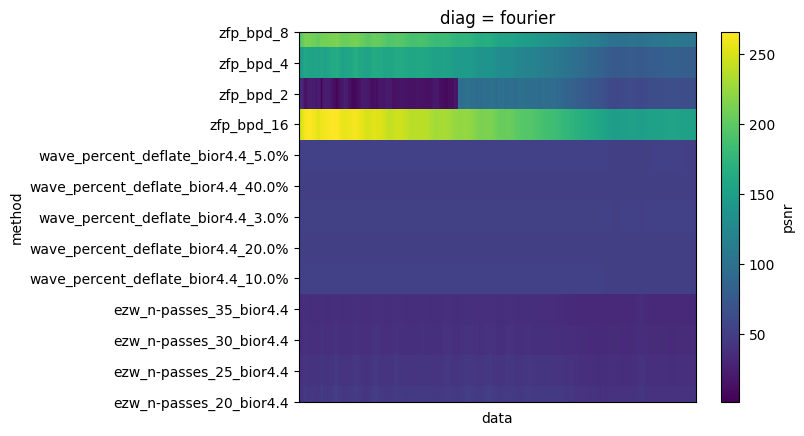

In [20]:
p = thphi_full_ds.psnr.sel(diag='fourier').plot() 
p.axes.get_xaxis().set_ticks([])


[]

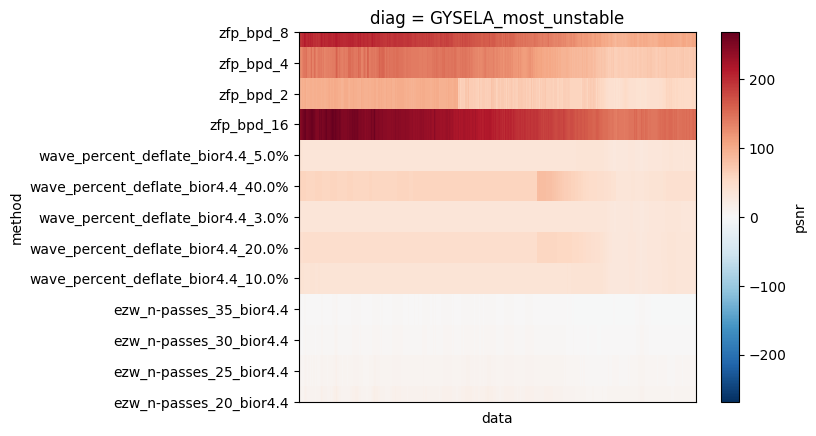

In [21]:
p = thphi_full_ds.psnr.sel(diag='GYSELA_most_unstable').plot() 
p.axes.get_xaxis().set_ticks([])


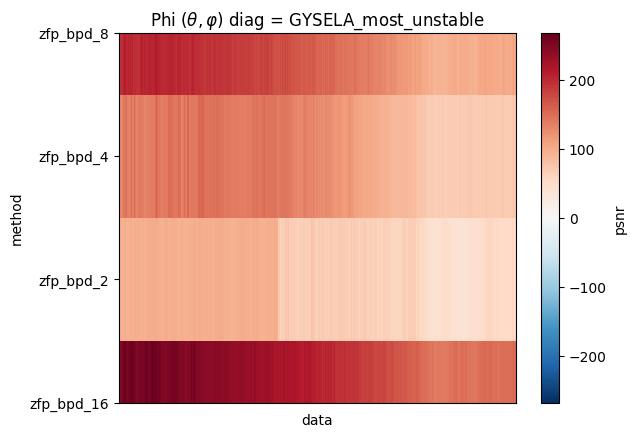

In [22]:
p = thphi_full_ds.psnr[9:].sel(diag='GYSELA_most_unstable').plot() 
p.axes.get_xaxis().set_ticks([])
plt.title(r'Phi $(\theta, \varphi)$ diag = GYSELA_most_unstable')
plt.savefig(images_dir + 'thphi_gyseladiag_psnr.png') 

[]

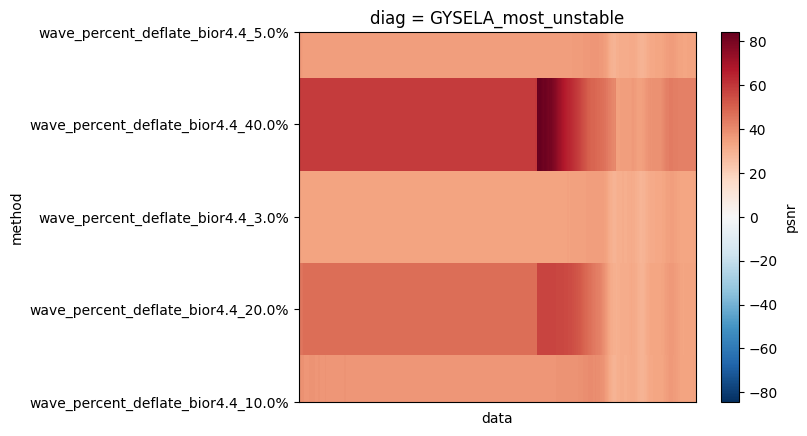

In [23]:
p = thphi_full_ds.psnr[4:9].sel(diag='GYSELA_most_unstable').plot() 
p.axes.get_xaxis().set_ticks([])

[]

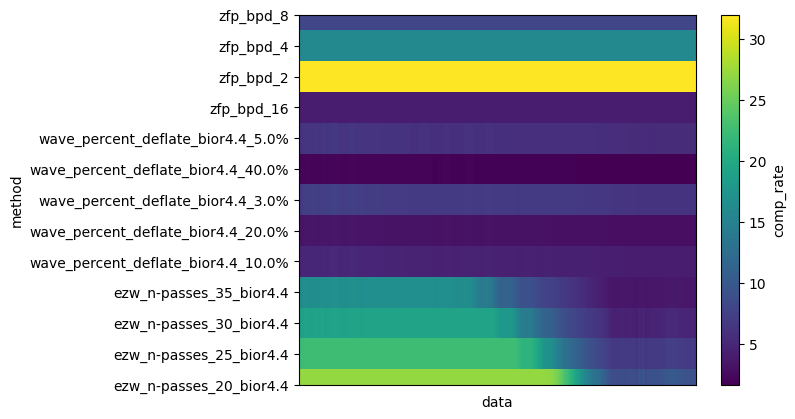

In [24]:
p = thphi_full_ds.comp_rate.plot() 
p.axes.get_xaxis().set_ticks([])

[]

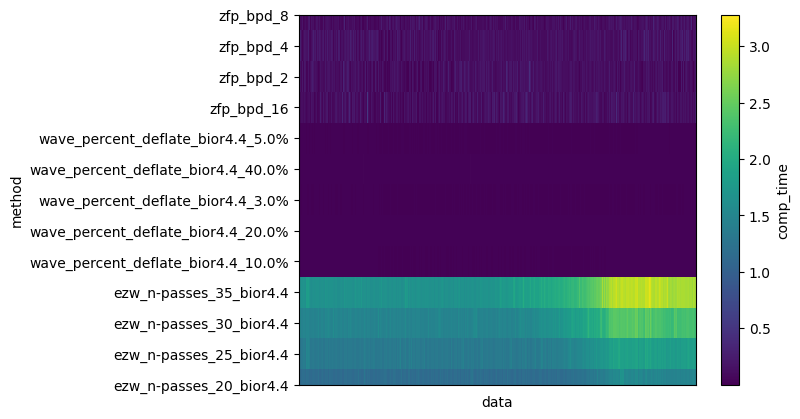

In [25]:
p = thphi_full_ds.comp_time.plot() 
p.axes.get_xaxis().set_ticks([])


[]

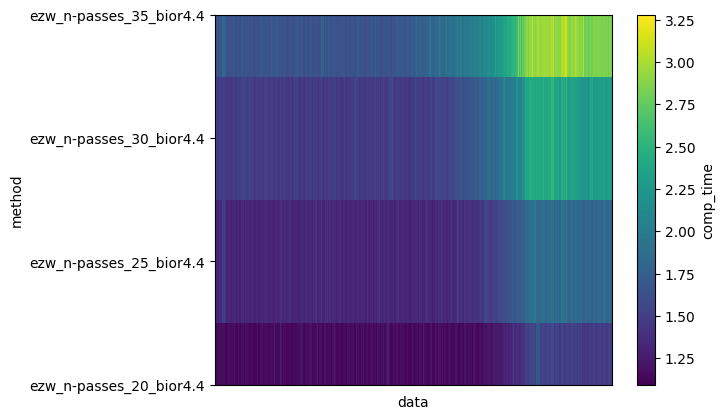

In [26]:
p = thphi_full_ds.comp_time[:4].plot() 
p.axes.get_xaxis().set_ticks([])



[]

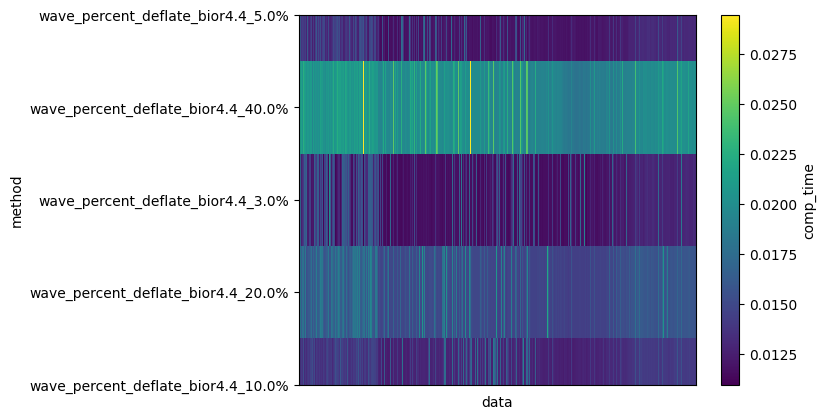

In [27]:
p = thphi_full_ds.comp_time[4:9].plot() 
p.axes.get_xaxis().set_ticks([])


[]

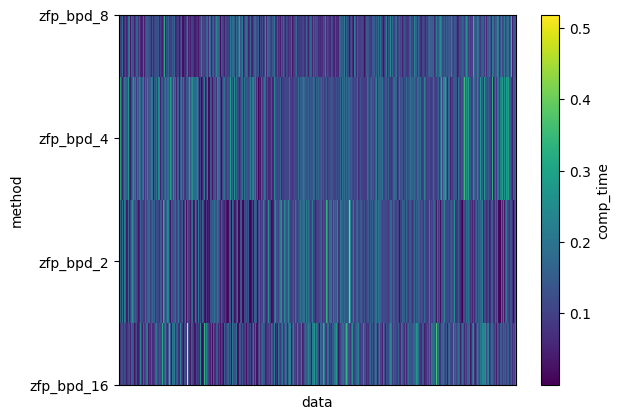

In [28]:
p = thphi_full_ds.comp_time[9:].plot() 
p.axes.get_xaxis().set_ticks([])


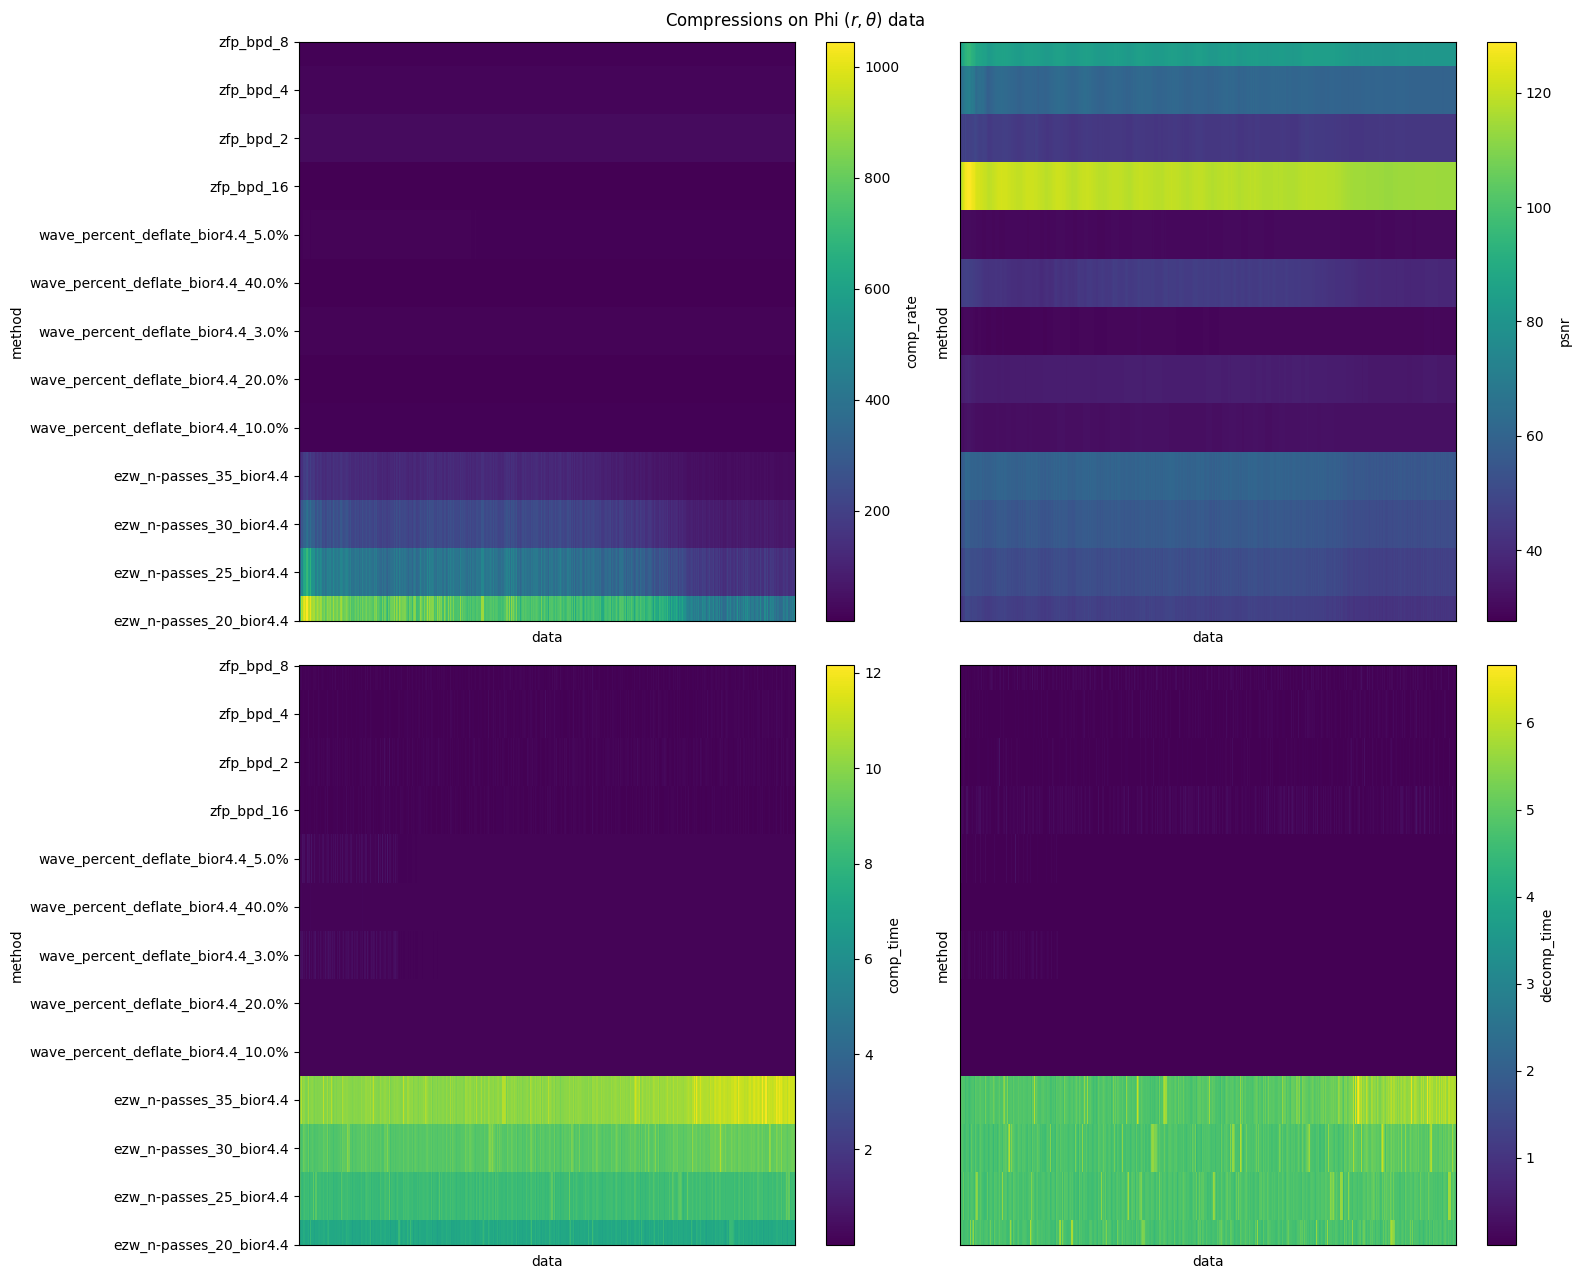

In [29]:
fig, axs = plt.subplots(2, 2, figsize=[16,13])

axs[0,0].axes.get_xaxis().set_ticks([]) 
rth_full_ds.comp_rate.plot(ax=axs[0,0]) 
axs[0,1].axes.get_xaxis().set_ticks([])
rth_full_ds.psnr.mean(dim='diag').plot(ax=axs[0,1])
axs[1,0].axes.get_xaxis().set_ticks([]) 
rth_full_ds.comp_time.plot(ax=axs[1,0]) 
axs[1,1].axes.get_xaxis().set_ticks([])
rth_full_ds.decomp_time.plot(ax=axs[1,1])

axs[0,1].axes.get_yaxis().set_ticks([]) 
axs[1,1].axes.get_yaxis().set_ticks([])

fig.suptitle(r'Compressions on Phi $(r,\theta)$ data')
fig.tight_layout() 

plt.savefig(images_dir + 'global_compression_results_Phirth.png')

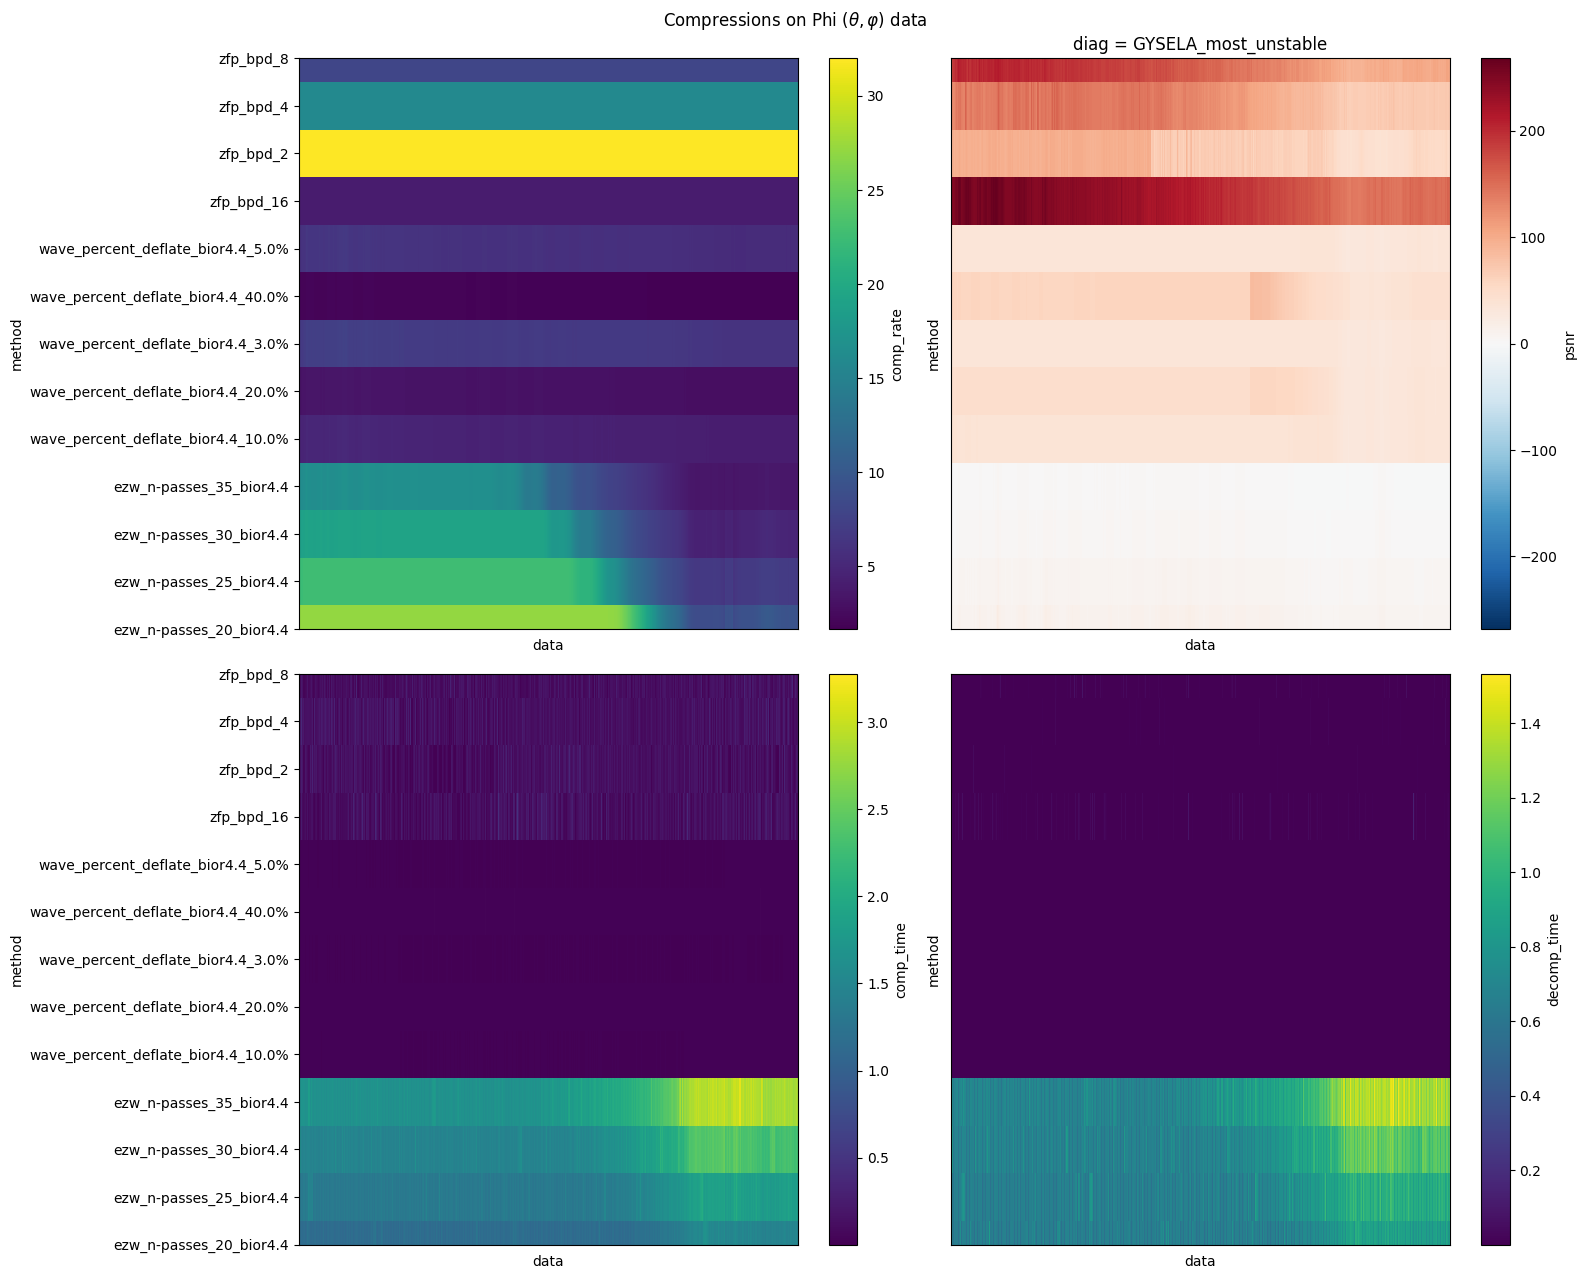

In [30]:
fig, axs = plt.subplots(2, 2, figsize=[16,13])

axs[0,0].axes.get_xaxis().set_ticks([]) 
thphi_full_ds.comp_rate.plot(ax=axs[0,0]) 
axs[0,1].axes.get_xaxis().set_ticks([])
thphi_full_ds.psnr.sel(diag='GYSELA_most_unstable').plot(ax=axs[0,1])
axs[1,0].axes.get_xaxis().set_ticks([]) 
thphi_full_ds.comp_time.plot(ax=axs[1,0]) 
axs[1,1].axes.get_xaxis().set_ticks([])
thphi_full_ds.decomp_time.plot(ax=axs[1,1])

axs[0,1].axes.get_yaxis().set_ticks([]) 
axs[1,1].axes.get_yaxis().set_ticks([])

fig.suptitle(r'Compressions on Phi $(\theta, \varphi)$ data')
fig.tight_layout() 

plt.savefig(images_dir + 'global_compression_results_Phithphi.png')

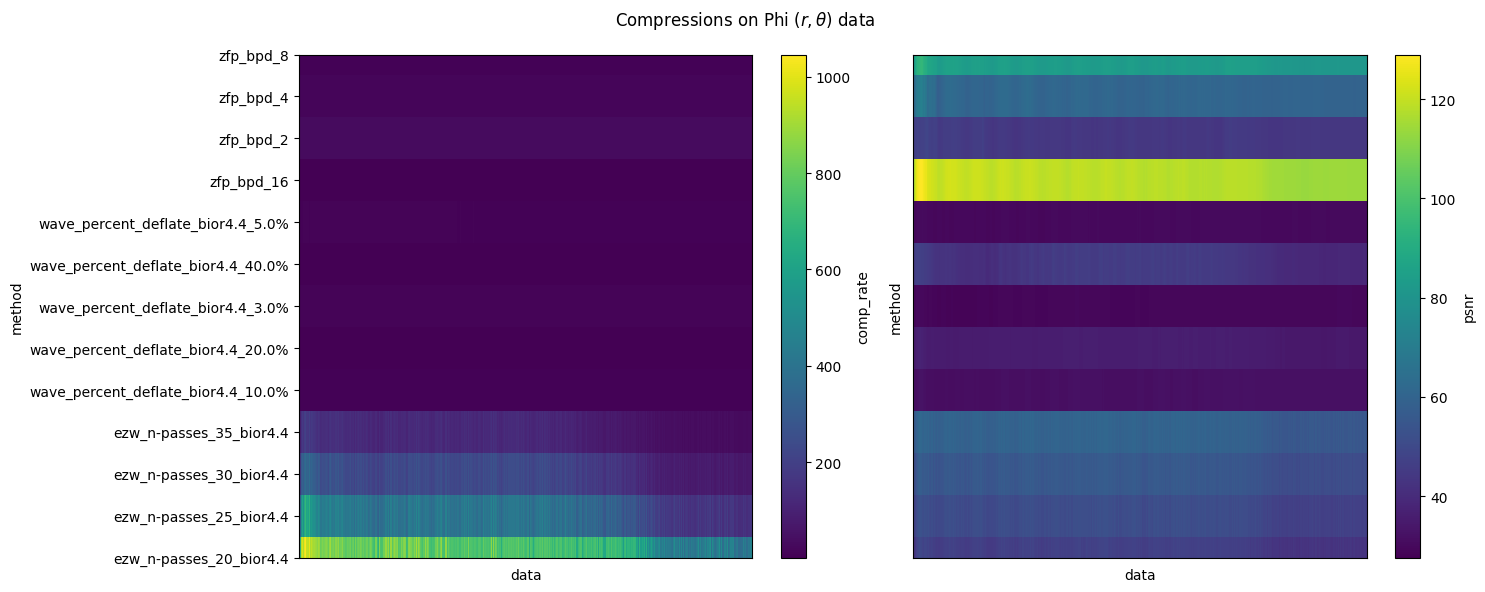

In [34]:
fig, axs = plt.subplots(1, 2, figsize=[15,6])

axs[0].axes.get_xaxis().set_ticks([]) 
rth_full_ds.comp_rate.plot(ax=axs[0]) 
axs[1].axes.get_xaxis().set_ticks([])
rth_full_ds.psnr.mean(dim='diag').plot(ax=axs[1])

axs[1].axes.get_yaxis().set_ticks([]) 

fig.suptitle(r'Compressions on Phi $(r,\theta)$ data')
fig.tight_layout() 

plt.savefig(images_dir + 'commpression_and_quality_phirth.png')

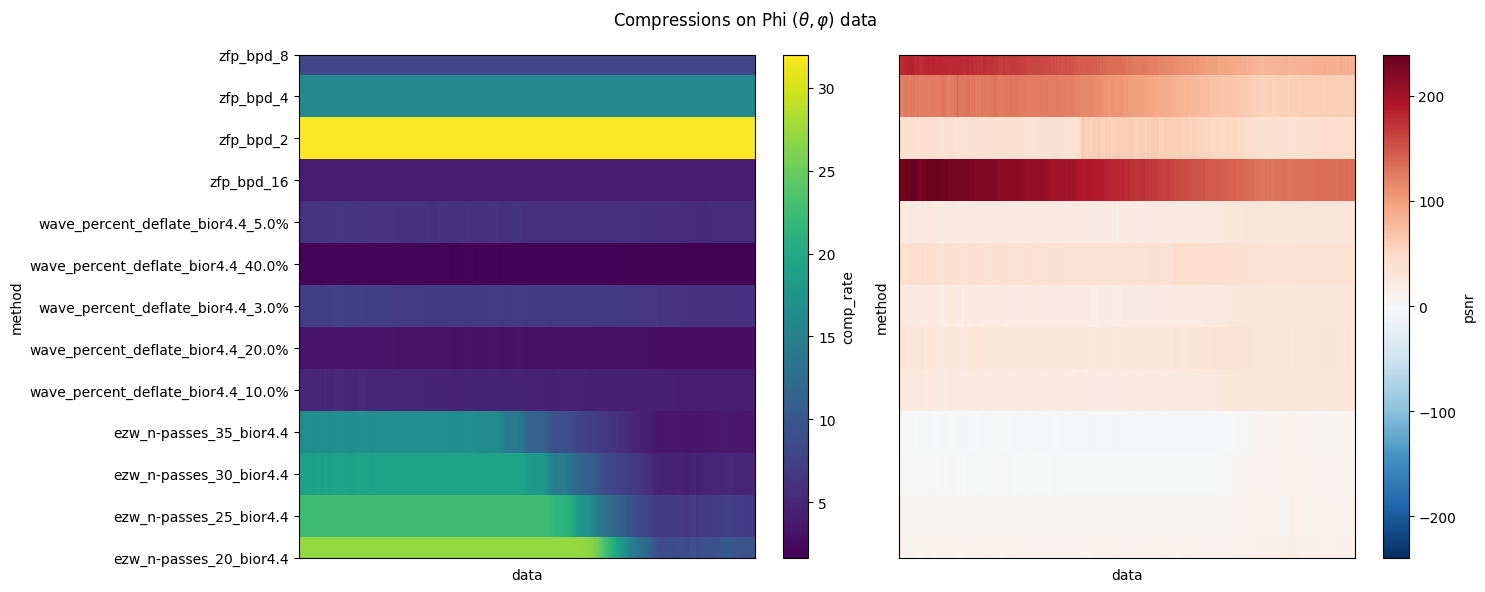

In [39]:
fig, axs = plt.subplots(1, 2, figsize=[15,6])

axs[0].axes.get_xaxis().set_ticks([]) 
thphi_full_ds.comp_rate.plot(ax=axs[0]) 
axs[1].axes.get_xaxis().set_ticks([])
thphi_full_ds.psnr.mean(dim='diag').plot(ax=axs[1])

axs[1].axes.get_yaxis().set_ticks([]) 

fig.suptitle(r'Compressions on Phi $(\theta, \varphi)$ data')
fig.tight_layout() 

plt.savefig(images_dir + 'commpression_and_quality_phithphi.png')